In [9]:
import scipy as sp
import numpy as np
import networkx as nx
from tqdm import tqdm # necessary because shuffling takes a while

def shuffle_net_sym_f(Net, Nsh):
    # Nsh = number of shuffles (* number of links)
    Shuf = Net
    I = list(nx.edges(Shuf))
    Nl = len(I)
    for ind in tqdm(range(Nl * Nsh)):
        L = np.random.randint(Nl, size = 2)
        while L[0] == L[1]:
            L[1] = np.random.randint(Nl)
    
        if Shuf.has_edge(I[L[0]][0], I[L[0]][1]) and Shuf.has_edge(I[L[1]][0], I[L[1]][1]) and (Shuf.has_edge(I[L[0]][0], I[L[1]][1]) == False) and (Shuf.has_edge(I[L[1]][0], I[L[0]][1]) == False) and (I[L[1]][0] != I[L[0]][1]) and (I[L[0]][0] != I[L[1]][1]) and (I[L[0]][0] != I[L[0]][1]) and (I[L[1]][0] != I[L[1]][1]):
            # delete links
            Shuf.remove_edge(I[L[0]][0], I[L[0]][1])
            Shuf.remove_edge(I[L[1]][0], I[L[1]][1])
            if Shuf.has_edge(I[L[0]][1], I[L[0]][0]):
                Shuf.remove_edge(I[L[0]][1], I[L[0]][0])
            if Shuf.has_edge(I[L[1]][1], I[L[1]][0]):
                Shuf.remove_edge(I[L[1]][1], I[L[1]][0])
            # shuffle links
            Shuf.add_edge(I[L[0]][0], I[L[1]][1])
            Shuf.add_edge(I[L[1]][1], I[L[0]][0])
            Shuf.add_edge(I[L[1]][0], I[L[0]][1])
            Shuf.add_edge(I[L[0]][1], I[L[1]][0])
            # remap links
            I = list(nx.edges(Shuf))
            Nl = len(I)
    return Shuf

In [10]:
data = sp.io.loadmat('Yeast_DIP.mat')
YSTnet = data['YSTnet']

Let's process the network, which is not symmetrized with loops

In [11]:
Ndir = np.sum(YSTnet - YSTnet.T)
Nloop = YSTnet.trace()

print(Ndir)
print(Nloop)

YSTnet.setdiag(0)
YSTnetSym = YSTnet + YSTnet.T

GraphYST = nx.from_scipy_sparse_array(YSTnetSym)

0.0
4713.0


In [12]:
Kyst = nx.degree_centrality(GraphYST)
Kyst = np.array(list(Kyst.values()))
Knn = np.divide(YSTnetSym * Kyst, Kyst)

<Axes: >

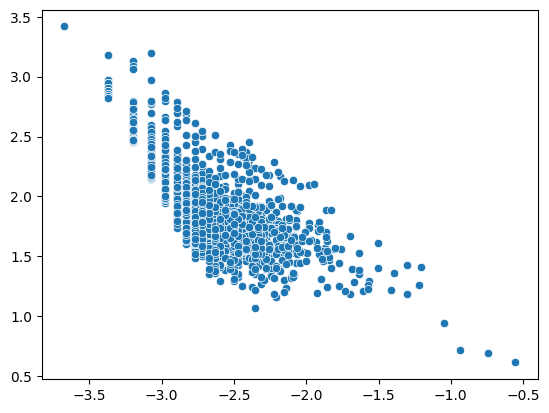

In [13]:
import seaborn as sns

sns.scatterplot(x=np.log10(Kyst), y=np.log10(Knn))

Let's shuffle links - microcanonical ensemble.
**NOTE**: microcanonical shuffle does not work with few iterations.

In [14]:
YSTshuf = shuffle_net_sym_f(GraphYST, 50) # maybe 50 is not enought but it takes about 2 hours and half to run

100%|██████████| 976400/976400 [1:08:31<00:00, 237.49it/s]


By shuffling we're actually creating another network with the same characteristic as the previous one: is it really the same network?
Well, it depends.
In some cases we actually lose information by shuffling, which means that links were not randomly generated in the original one, like in that case.

<Axes: >

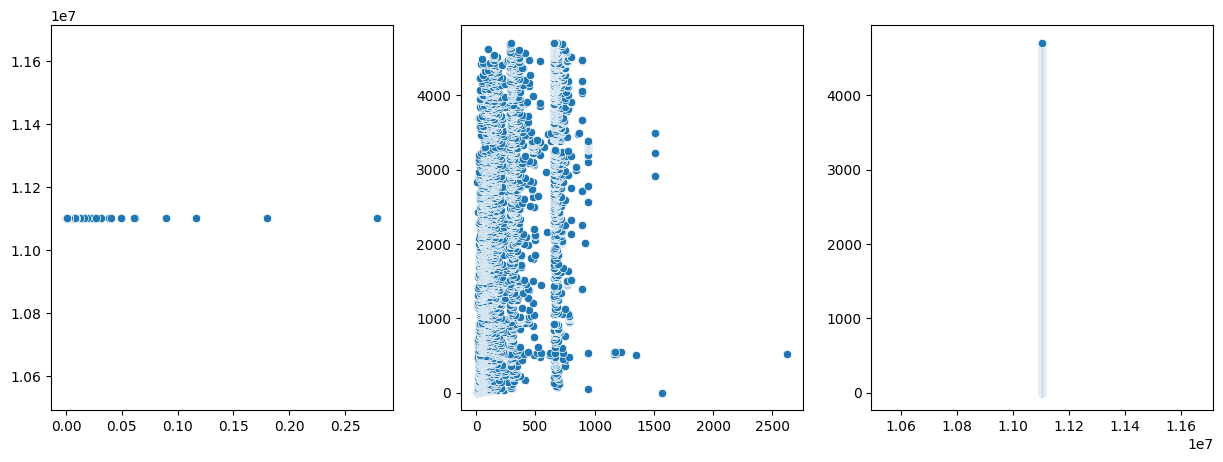

In [15]:
YSTshufK = np.sum(YSTshuf, axis = 0)
KnnS = np.divide(YSTshuf * YSTshufK, YSTshufK)

from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
sns.scatterplot(x=Kyst, y=YSTshufK, ax=ax[0])
sns.scatterplot(x=Knn, y=KnnS, ax=ax[1])
sns.scatterplot(x=YSTshufK, y=KnnS, ax=ax[2])